In [1]:
function sigmoid(x)
    return 1 / (1 + exp(-x))
end

sigmoid (generic function with 1 method)

In [2]:
function f(x1, w)
    # 決定境界の直線の方程式
    # p(C1|X) > 0.5 -> XをC1に分類
    # p(C1|X) < 0.5 -> XをC2に分類
    # 次元は全部同じなので，"./"などは不要
    a = - (w[2] / w[3])
    b = - (w[1] / w[3])
    return a * x1 + b
end

f (generic function with 1 method)

## 訓練データ作成と学習

In [3]:
using Distributions
using Plots
using LinearAlgebra

# Plotsを使う際のおまじない
gr()
ENV["PLOTS_TEST"] = "true"

# 訓練データを作成
N = 500
mean1 = [-2 2]
mean2 = [1 -1]
mean3 = [8 -6]
cov = [1.0 0.8; 0.8 1.0]

# ノイズありデータ作成
cls1 = zeros(0)
for i in 1:2
    d = Normal(mean1[i], cov[i]) # mean1とcovから生成した正規分布
    append!(cls1, rand(d, div(N, 2))) # 正規分布からランダムにN/2個選択
end
cls1 = reshape(cls1, (div(N, 2), 2))

cls2 = zeros(0)
for i in 1:2
    d = Normal(mean2[i], cov[i, 2])
    append!(cls2, rand(d, div(N, 2) - div(N, 5)))
    d = Normal(mean3[i], cov[i, 2])
    append!(cls2, rand(d, div(N, 5)))
end
cls2 = reshape(cls2, (div(N, 2), 2))

# トレーニングデータXの作成
cls = vcat(cls1, cls2)
temp = ones(N)
X = hcat(temp, cls)

# ラベルTを作成
t = zeros(0)
for i in 1:div(N, 2)
    append!(t, 1.0)
end
for i in 1:div(N, 2)
    append!(t, 0.0)
end

# パラメータwをIRLSで更新
turn = 0
w = [0.0 0.0 0.0]  # 適当な初期値
while true
    phi = X

    # Rとyを計算
    R = zeros(N, N)
    y = zeros(0)
    for n in 1:N
        a = dot(w, phi[n, :])
        y_n = sigmoid(a)
        R[n, n] = y_n * (1.0 - y_n)
        append!(y, y_n)
    end
    
    # ヘッセ行列Hを計算
    phi_T = phi' #3*100
    H = phi_T * R * phi

    # wを更新
    w_new = vec(w) .- inv(H) * (phi_T * (y - t))

    # wの収束判定
    diff = norm(w_new .- w) ./ norm(w)
    println("turn:", turn)
    println("diff:", diff)
    if diff < 0.05
        break
    end
    
    w = w_new
    turn += 1
end

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1189


turn:0
diff:Inf
turn:1
diff:0.8221844509940889
turn:2
diff:0.9376091487045684
turn:3
diff:0.5463857320856792
turn:4
diff:0.38376212768597995
turn:5
diff:0.30663650499999245
turn:6
diff:0.24388330281426232
turn:7
diff:0.16206504814630182
turn:8
diff:0.06537299709856213
turn:9
diff:0.009091106983200323


## 入力データと識別境界の描画

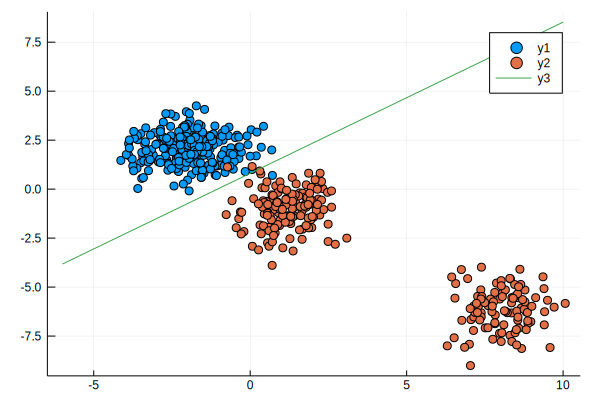

In [4]:
#入力データの描画
x = cls[:, 1]
y = cls[:, 2]
x = reshape(x, (div(N, 2), 2))
y = reshape(y, (div(N, 2), 2))
plot(x, y, seriestype=:scatter)

# 識別境界を描画
# linspace()はv1.0.1では使えない(v1.0から?)
# x1 = linspace(-6, 10, 100)
x1 = range(-6, stop=10, length=100)
x2 = [f(x, w) for x in x1]
plot!(x1, x2) # "!"をつけることでレイヤーの上書きをする
# savefig("logistic.png")